In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
twentyeleven = pd.read_csv('twentyeleven.csv')
twentyeleven.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'date', 'revenue', 'year'],
      dtype='object')

In [4]:
twentyeleven.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484330 entries, 0 to 484329
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      484329 non-null  float64
 1   StockCode    484330 non-null  object 
 2   Description  484330 non-null  object 
 3   Quantity     484330 non-null  int64  
 4   InvoiceDate  484330 non-null  object 
 5   Price        484330 non-null  float64
 6   Customer ID  367058 non-null  float64
 7   Country      484330 non-null  object 
 8   date         484330 non-null  object 
 9   revenue      484330 non-null  float64
 10  year         484330 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 40.6+ MB


In [5]:
twentyeleven.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,revenue,year
0,539993.0,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04T10:00:00Z,1.95,13313.0,United Kingdom,2011-01-04,19.5,2011
1,539993.0,21499,BLUE POLKADOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011


In [6]:
twentyeleven['date'] = pd.to_datetime(twentyeleven['date'])

In [7]:
df = twentyeleven[(twentyeleven['Country'] == 'United Kingdom') & (twentyeleven['year'] == 2011)]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,revenue,year
0,539993.0,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04T10:00:00Z,1.95,13313.0,United Kingdom,2011-01-04,19.5,2011
1,539993.0,21499,BLUE POLKADOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
2,539993.0,21498,RED RETROSPOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
3,539993.0,22379,RECYCLING BAG RETROSPOT,5,2011-01-04T10:00:00Z,2.10,13313.0,United Kingdom,2011-01-04,10.5,2011
4,539993.0,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04T10:00:00Z,1.25,13313.0,United Kingdom,2011-01-04,12.5,2011


In [8]:
df = df.groupby(by = df['date'])[['Quantity']].sum()
df

,Quantity
date,
2011-01-04,8337
2011-01-05,19034
2011-01-06,17929
2011-01-07,13276
2011-01-09,7321
...,...
2011-12-05,42817
2011-12-06,28464
2011-12-07,29821


C:\Users\thanh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thanh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='Quantity'>

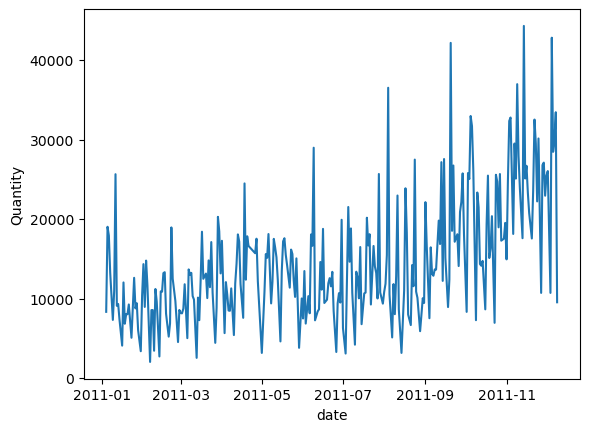

In [9]:
sns.lineplot(data = df, x = 'date', y = 'Quantity')

In [10]:
df = twentyeleven[
        (twentyeleven['Country'].isin(['Canada','Denmark','EIRE','United Kingdom'])) & 
        (twentyeleven['year'] == 2011)]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,revenue,year
0,539993.0,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04T10:00:00Z,1.95,13313.0,United Kingdom,2011-01-04,19.5,2011
1,539993.0,21499,BLUE POLKADOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
2,539993.0,21498,RED RETROSPOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
3,539993.0,22379,RECYCLING BAG RETROSPOT,5,2011-01-04T10:00:00Z,2.10,13313.0,United Kingdom,2011-01-04,10.5,2011
4,539993.0,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04T10:00:00Z,1.25,13313.0,United Kingdom,2011-01-04,12.5,2011


In [11]:
df_grouped = df.groupby(by=['Country', 'date']).agg(daily_sales=('Quantity', 'sum')).reset_index()
df_grouped

,Country,date,daily_sales
0,Canada,2011-03-14,88
1,Canada,2011-05-04,504
2,Canada,2011-06-20,1092
3,Canada,2011-07-11,1026
4,Canada,2011-07-15,1
...,...,...,...
454,United Kingdom,2011-12-05,42817
455,United Kingdom,2011-12-06,28464
456,United Kingdom,2011-12-07,29821
457,United Kingdom,2011-12-08,33443


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

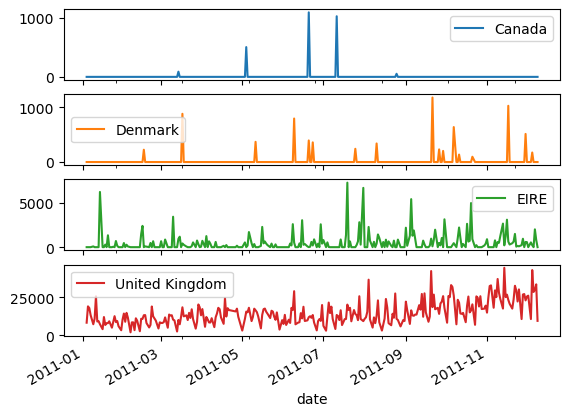

In [12]:
df_grouped_pivoted = df_grouped.pivot_table(values = 'daily_sales', columns = 'Country', index = 'date', fill_value=0)
df_grouped_pivoted.plot(subplots = True)

In [13]:
cars = pd.read_csv('cars.csv')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      428 non-null    object 
 1   sports_car                428 non-null    bool   
 2   suv                       428 non-null    bool   
 3   wagon                     428 non-null    bool   
 4   minivan                   428 non-null    bool   
 5   pickup                    428 non-null    bool   
 6   all_wheel                 428 non-null    bool   
 7   rear_wheel                428 non-null    bool   
 8   Price                     428 non-null    int64  
 9   Dealer_Cost               428 non-null    int64  
 10  Engine_size               428 non-null    float64
 11  cylenders                 428 non-null    int64  
 12  horsepower                428 non-null    int64  
 13  city_miles_per_galloon    414 non-null    float64
 14  highway_mi

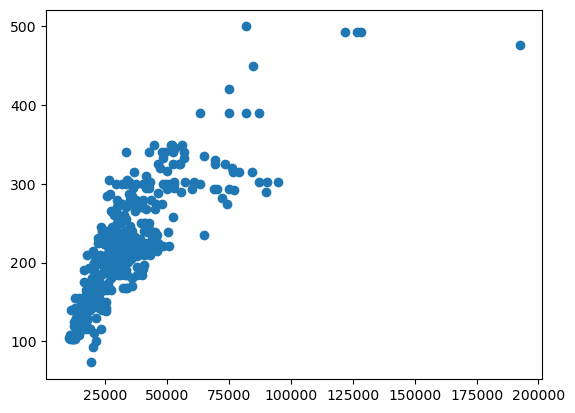

In [14]:
plt.scatter(x = cars['Price'], y = cars['horsepower'])

<Axes: xlabel='Price', ylabel='horsepower'>

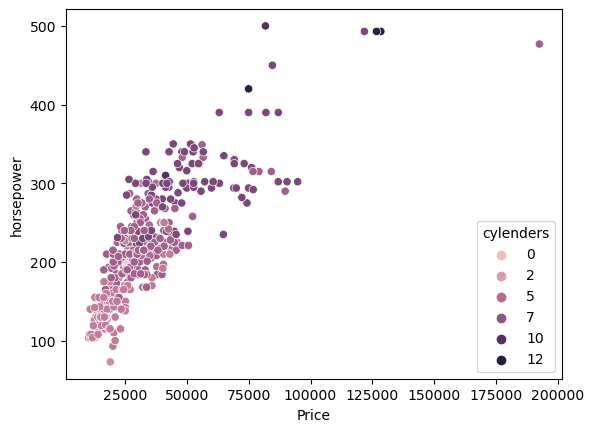

In [15]:
sns.scatterplot(x = cars['Price'], y = cars['horsepower'], hue = cars['cylenders'])

In [16]:
iris = pd.read_csv('iris.csv')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


C:\Users\thanh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sepal_length', ylabel='Density'>

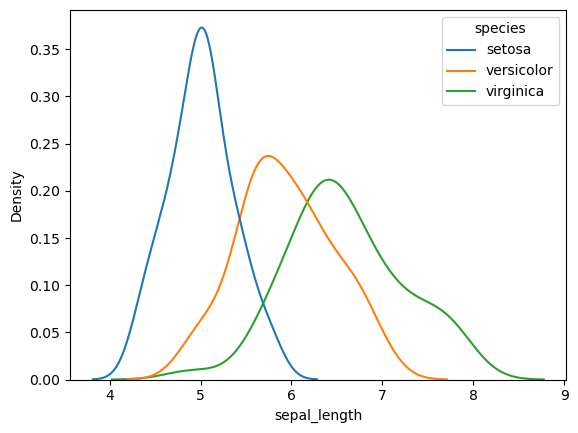

In [17]:
sns.kdeplot(data = iris, x = 'sepal_length', hue = 'species')

In [18]:
cars_new = cars[cars['cylenders'].isin([4,6,8])]

<Axes: xlabel='cylenders', ylabel='horsepower'>

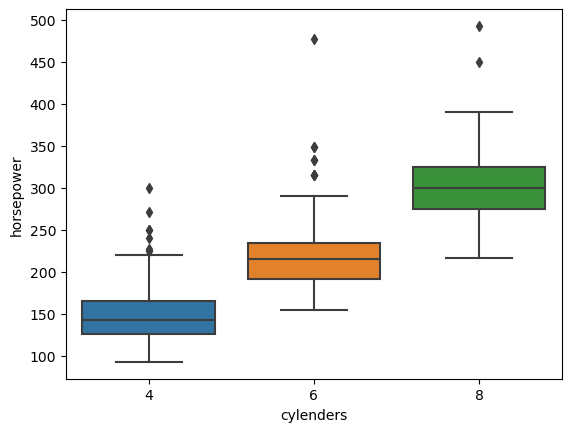

In [19]:
sns.boxplot(data = cars_new, x = 'cylenders', y = 'horsepower')

C:\Users\thanh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thanh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thanh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thanh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

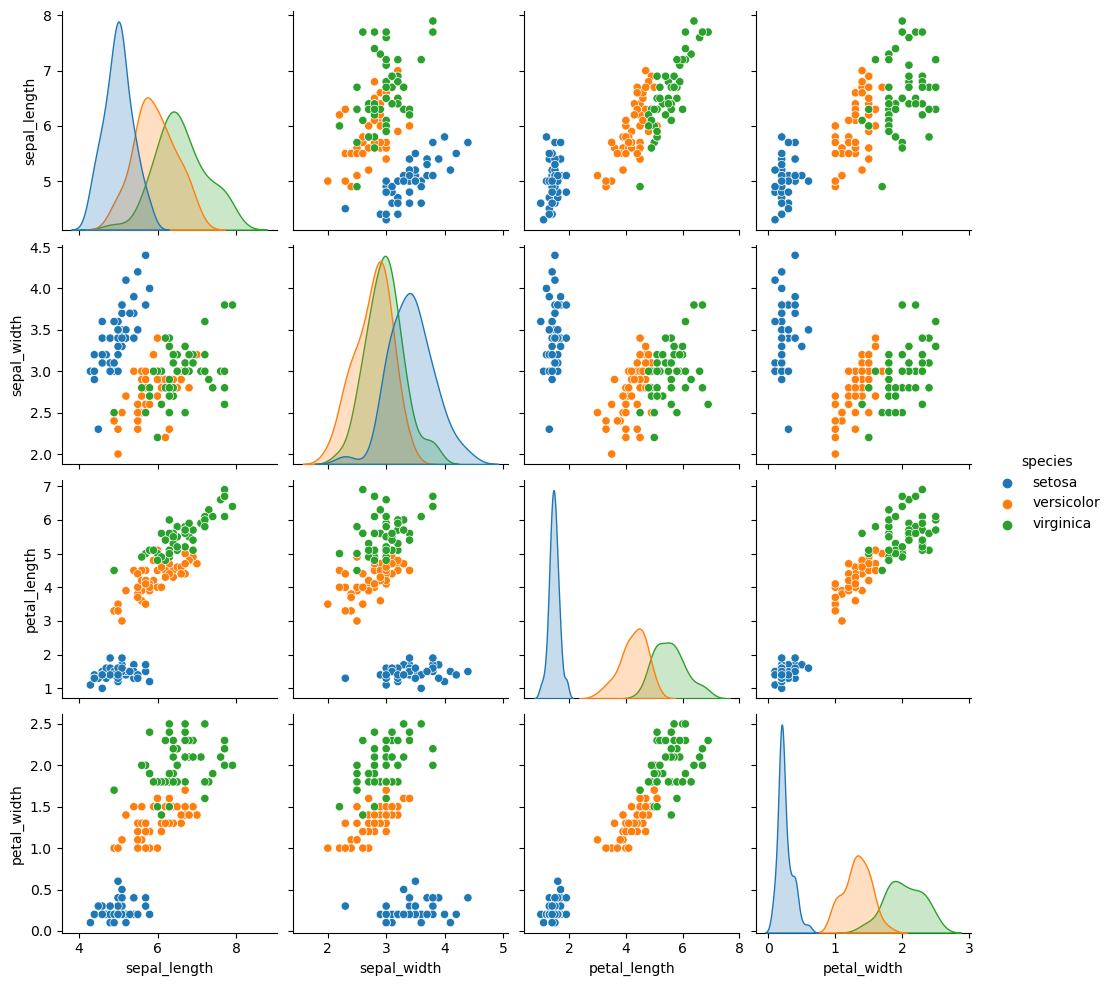

In [20]:
sns.pairplot(data = iris, hue = 'species')